In [2]:
import tensorflow as tf
print( tf. __version__ )

2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
dataset = pd.read_csv("/content/dataset.csv")
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
dataset.rename(columns = {'Nacionality':'Nationality'}, inplace = True)


In [8]:
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
dataset['Target'] = dataset['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [ ]:
dataset.head()

In [ ]:
#X= dataset.iloc[:0,35]
#y= dataset.iloc[:,35]

In [10]:
X = dataset.drop("Target", axis=1)
y = dataset['Target']

In [ ]:
y

In [ ]:
y.head()

In [ ]:
dataset.head()

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
#using feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [13]:
from tensorflow.keras.utils import to_categorical

# Convert target variable 'y' to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)


In [ ]:
X_train.shape

(3539, 34)

In [ ]:
y_train.shape

(3539,)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# param_grid = {
#     'n_estimators':[100, 200, 300],
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_features': ['sqrt', 'log2'],
#     'ccp_alpha': [0.1, .01, .001],
#     'max_depth' : [5, 6, 7, 8, 9],
# }

param_grid = {
    'n_estimators':[400],
    'criterion':["gini", "entropy", "log_loss"],
    'min_samples_split':[2, 5, 10, 20],
    'min_samples_leaf':[1],
    'max_features':["sqrt", "log2"],
    'max_depth':[30, 50, 70, 100],
    'bootstrap':[False],
    'random_state':[9],

    'n_jobs':[4, 10],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, refit = True, cv=5, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=4, random_state=9;, score=0.782 total time=   2.8s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=4, random_state=9;, score=0.761 total time=   1.9s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=4, random_state=9;, score=0.739 total time=   1.8s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=4, random_state=9;, score=0.770 total time=   1.8s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, n_jobs=4, rando

KeyboardInterrupt: 

In [ ]:
rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=30,
    min_samples_split=5,
    n_estimators=400,
    n_jobs=4,
    random_state=9
)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8045197740112995

In [ ]:
##creating the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
## Input layer, i have 35 input layers
##ANN
classifier = Sequential()
classifier.add(Dense(32,input_shape=(34,),activation='relu'))
classifier.add(Dense(units=26,activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=26,activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(3,activation = 'softmax'))

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1120      
                                                                 
 dense_1 (Dense)             (None, 26)                858       
                                                                 
 dropout (Dropout)           (None, 26)                0         
                                                                 
 dense_2 (Dense)             (None, 26)                702       
                                                                 
 dropout_1 (Dropout)         (None, 26)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 81        
                                                                 
Total params: 2761 (10.79 KB)
Trainable params: 2761 (10

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train_encoded)
test_predictions = lasso_model.predict(X_test)
train_predictions = lasso_model.predict(X_train)

In [ ]:
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
model_history = classifier.fit(X_train,y_train_encoded,validation_split=0.33,batch_size=32,epochs=200,callbacks=early_stopping)

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

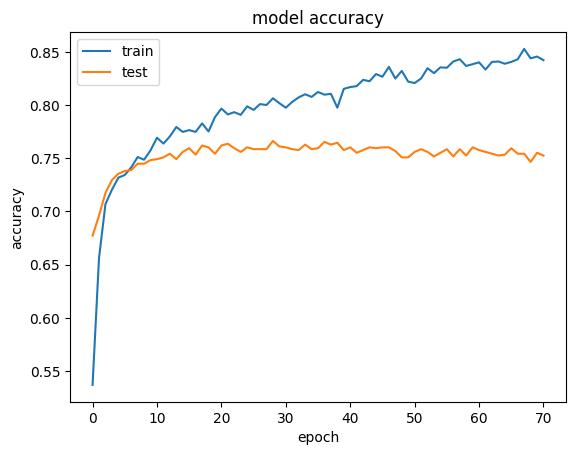

In [ ]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"], loc='upper left')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
dataset.head()

In [ ]:
X_train

In [ ]:
data_set=X
scaled_data = sc.transform(data_set)
pca.fit(scaled_data)

In [ ]:
dataset.keys()

In [ ]:
x_pca=pca.transform(scaled_data)

In [ ]:
scaled_data.shape

In [ ]:
x_pca.shape

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],d=X['target'])
plt.xlabel('First component')
plt.xlabel('Second component')